Nama : Enrico Adi

NRP : 220180499

Algoritma yang dipakai : ID3

Dataset : Rain in Australia Dataset (https://github.com/EnricoAdi/rain-in-australia) from (https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

Target Class = RainTomorrow (Yes atau No)

Load Dataset dari Github

In [4]:
!git clone "https://github.com/EnricoAdi/rain-in-australia.git"

fatal: destination path 'rain-in-australia' already exists and is not an empty directory.


In [5]:
%cd rain-in-australia

c:\1.KULIAH\SISTEM_INFORMASI_BISNIS_ENRICO\SEMESTER_8\other\RainInAustralia\backend\NoteBook\rain-in-australia


c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
%pip install decision-tree-id3

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
dataset = pd.read_csv("rain-in-australia.csv", delimiter=",")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
# Begin Preprocessing
# Hapus kolom date
dataset = dataset.drop('Date', axis=1, errors='ignore')
# Drop Evaporation karena 42% data null
dataset = dataset.drop('Evaporation', axis=1, errors='ignore')
# Drop Sunshine karena 47% data null
dataset = dataset.drop('Sunshine', axis=1, errors='ignore')
dataset = dataset.drop('Location', axis=1, errors='ignore')

In [10]:
# Delete semua row dengan value RainTomorrow = NA
print(dataset.RainTomorrow.unique())

df = dataset.dropna(axis=0,subset=['RainTomorrow'])
print(df.RainTomorrow.unique())
dropped = len(dataset)-len(df)
print(f"Deleted Row Count: {dropped}")


['No' 'Yes' nan]
['No' 'Yes']
Deleted Row Count: 3267


In [11]:
for (columnName, columnData) in df.items():
    print(f"Data {columnName} yang masih null : {df[df[columnName].isna()].shape[0]}")

Data MinTemp yang masih null : 637
Data MaxTemp yang masih null : 322
Data Rainfall yang masih null : 1406
Data WindGustDir yang masih null : 9330
Data WindGustSpeed yang masih null : 9270
Data WindDir9am yang masih null : 10013
Data WindDir3pm yang masih null : 3778
Data WindSpeed9am yang masih null : 1348
Data WindSpeed3pm yang masih null : 2630
Data Humidity9am yang masih null : 1774
Data Humidity3pm yang masih null : 3610
Data Pressure9am yang masih null : 14014
Data Pressure3pm yang masih null : 13981
Data Cloud9am yang masih null : 53657
Data Cloud3pm yang masih null : 57094
Data Temp9am yang masih null : 904
Data Temp3pm yang masih null : 2726
Data RainToday yang masih null : 1406
Data RainTomorrow yang masih null : 0


In [12]:
#preprocess town name to number

# print(df)
# Location = df.Location.map({"Albury":0, "BadgerysCreek":1, "Cobar":2, "CoffsHarbour":3, "Moree":4,
#       "Newcastle":5, "NorahHead":6, "NorfolkIsland":7, "Penrith":8, "Richmond":9, "Sydney":10,
#       "SydneyAirport":11, "WaggaWagga":12, "Williamtown":13, "Wollongong":14, "Canberra":15, "Tuggeranong":16,
#       "MountGinini":17, "Ballarat":18, "Bendigo":19, "Sale":20, "MelbourneAirport":21, "Melbourne":22,
#       "Mildura":23, "Nhil":24, "Portland":25, "Watsonia":26, "Dartmoor":27, "Brisbane":28,
#       "Cairns":29, "GoldCoast":30, "Townsville":31, "Adelaide":32, "MountGambier":33, "Nuriootpa":34,
#       "Woomera":35, "Albany":36, "Witchcliffe":37, "PearceRAAF":38, "PerthAirport":39, "Perth":40,
#       "SalmonGums":41, "Walpole":42, "Hobart":43, "Launceston":44, "AliceSprings":45, "Darwin":46,
#       "Katherine":47, "Uluru":48})
# df.Location = Location
# print(df)

In [13]:
#Iterate each column, replace null value for float64 columns, replace with most frequent values for object columns
for (columnName, columnData) in df.items():
    temp = df[columnName]
    if(columnName!="Location"):
      if(columnData.dtypes=="float64"):
        temp = temp.fillna(temp.mean())
      elif(columnData.dtypes=="object" and columnName!="RainTomorrow"):
        maxTemp = df[columnName].mode()[0]
        print(f"Filling {columnName} null data with {maxTemp}")
        temp = temp.fillna(maxTemp)
      df[columnName] = temp
    # print('Column Contents : ', columnData.values)

Filling WindGustDir null data with W
Filling WindDir9am null data with N
Filling WindDir3pm null data with SE
Filling RainToday null data with No


C:\Users\Enrico\AppData\Local\Temp\ipykernel_7496\3700554000.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columnName] = temp
C:\Users\Enrico\AppData\Local\Temp\ipykernel_7496\3700554000.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columnName] = temp
C:\Users\Enrico\AppData\Local\Temp\ipykernel_7496\3700554000.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [14]:
# # Note alternatif buat evaporation and sunshine
# # Drop Evaporation karena 42% data null
# df = df.drop('Evaporation', axis=1, errors='ignore')
# # Drop Sunshine karena 47% data null
# df = df.drop('Sunshine', axis=1, errors='ignore')
# df = df.drop('Location', axis=1, errors='ignore')

# Length of null
# print(f"Persentase data WindGustDir yang null : {df[df.WindGustDir.isna()].shape[0]*100/len(df)}%")

# print(df.WindDir9am.unique())

WindGustDir = df.WindGustDir.map({"W":0, "WNW":1, "WSW":2, "NE":3, "NNW":4,
      "N":5, "NNE":6, "SW":7, "ENE":8, "SSE":9, "S":10,
      "NW":11, "SE":12, "ESE":13, "E":14,
      "SSW":15})
df.WindGustDir = WindGustDir


WindDir9am = df.WindDir9am.map({"W":0, "WNW":1, "WSW":2, "NE":3, "NNW":4,
      "N":5, "NNE":6, "SW":7, "ENE":8, "SSE":9, "S":10,
      "NW":11, "SE":12, "ESE":13, "E":14,
      "SSW":15})
df.WindDir9am = WindDir9am

WindDir3pm = df.WindDir3pm.map({"W":0, "WNW":1, "WSW":2, "NE":3, "NNW":4,
      "N":5, "NNE":6, "SW":7, "ENE":8, "SSE":9, "S":10,
      "NW":11, "SE":12, "ESE":13, "E":14,
      "SSW":15})
df.WindDir3pm = WindDir3pm


RainToday = df.RainToday.map({"Yes":0, "No":1})
df.RainToday = RainToday

for (columnName, columnData) in df.items():
    print(f"Data {columnName} yang masih null : {df[df[columnName].isna()].shape[0]}")

C:\Users\Enrico\AppData\Local\Temp\ipykernel_7496\962021073.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.WindGustDir = WindGustDir


Data MinTemp yang masih null : 0
Data MaxTemp yang masih null : 0
Data Rainfall yang masih null : 0
Data WindGustDir yang masih null : 0
Data WindGustSpeed yang masih null : 0
Data WindDir9am yang masih null : 0
Data WindDir3pm yang masih null : 0
Data WindSpeed9am yang masih null : 0
Data WindSpeed3pm yang masih null : 0
Data Humidity9am yang masih null : 0
Data Humidity3pm yang masih null : 0
Data Pressure9am yang masih null : 0
Data Pressure3pm yang masih null : 0
Data Cloud9am yang masih null : 0
Data Cloud3pm yang masih null : 0
Data Temp9am yang masih null : 0
Data Temp3pm yang masih null : 0
Data RainToday yang masih null : 0
Data RainTomorrow yang masih null : 0


C:\Users\Enrico\AppData\Local\Temp\ipykernel_7496\962021073.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.WindDir9am = WindDir9am
C:\Users\Enrico\AppData\Local\Temp\ipykernel_7496\962021073.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.WindDir3pm = WindDir3pm
C:\Users\Enrico\AppData\Local\Temp\ipykernel_7496\962021073.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [15]:
# RainTomorrow = df.RainTomorrow.map({"Yes":0, "No":1})
# df.RainTomorrow = RainTomorrow

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
# print(df)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0,44.0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,1,No
1,7.4,25.1,0.0,1,44.0,4,2,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,1,No
2,12.9,25.7,0.0,2,46.0,0,2,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,1,No
3,9.2,28.0,0.0,3,24.0,12,14,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,1,No
4,17.5,32.3,1.0,0,41.0,8,11,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,1,No


In [16]:
df.to_csv("rain_in_australia_preprocessed.csv")

In [17]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from id3 import export_graphviz

In [18]:
#train test split (75% train, 25% test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [19]:
# print(x_train)
# estimator = Id3Estimator()
# estimator = Id3Estimator(max_depth=5, prune=True) #82.7
# estimator = Id3Estimator(max_depth=9, prune=True, gain_ratio=True, is_repeating=True, min_samples_split=10) #83.9
estimator = Id3Estimator(max_depth=5, prune=False, gain_ratio=True,  min_samples_split=10)
estimator.fit(x_train, y_train, check_input=True)

Id3Estimator(gain_ratio=True, max_depth=5, min_samples_split=10)

In [20]:
from sklearn.metrics import accuracy_score
y_pred = estimator.predict(x_test)
# print(len(y_pred))
# print(len(y_test))
# for i in (0,len(y_pred)):
#   print(i)
# print('Y Test')
# for i in y_test:
#   print(i)
print("Y PRED")
print(y_pred)
print('Y TEST')
print(y_test)
acc_score = round(accuracy_score(y_pred, y_test), 3)
print(f'Accuracy: {acc_score}')

print(classification_report(y_test, y_pred))

Y PRED
['Yes' 'No' 'No' ... 'No' 'No' 'Yes']
Y TEST
57760     Yes
127128     No
119994     No
7088       No
62992     Yes
         ... 
125401     No
68895     Yes
142848     No
61396      No
60760     Yes
Name: RainTomorrow, Length: 35549, dtype: object
Accuracy: 0.827
              precision    recall  f1-score   support

          No       0.85      0.94      0.89     27623
         Yes       0.68      0.43      0.52      7926

    accuracy                           0.83     35549
   macro avg       0.76      0.68      0.71     35549
weighted avg       0.81      0.83      0.81     35549



In [21]:
# Export tree with graphviz

df_dummified = pd.get_dummies(df)
columns = df_dummified.columns  #returns index object holding new column names

exportName = 'tree'
dot_data = export_graphviz(estimator.tree_, f'{exportName}.dot', columns.tolist())

In [22]:
# EXPORT MODEL WITH PICKLE
import pickle

# # save the iris classification model as a pickle file
model_pkl_file = "tree_id3_rain_in_australia.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(estimator, file)
# import site
# site.getsitepackages()
# !pip list

In [23]:
from graphviz import Source
path = f'{exportName}.dot'
s = Source.from_file(path)
s.format = "png"
s.render(f"{exportName}")

ModuleNotFoundError: No module named 'graphviz'

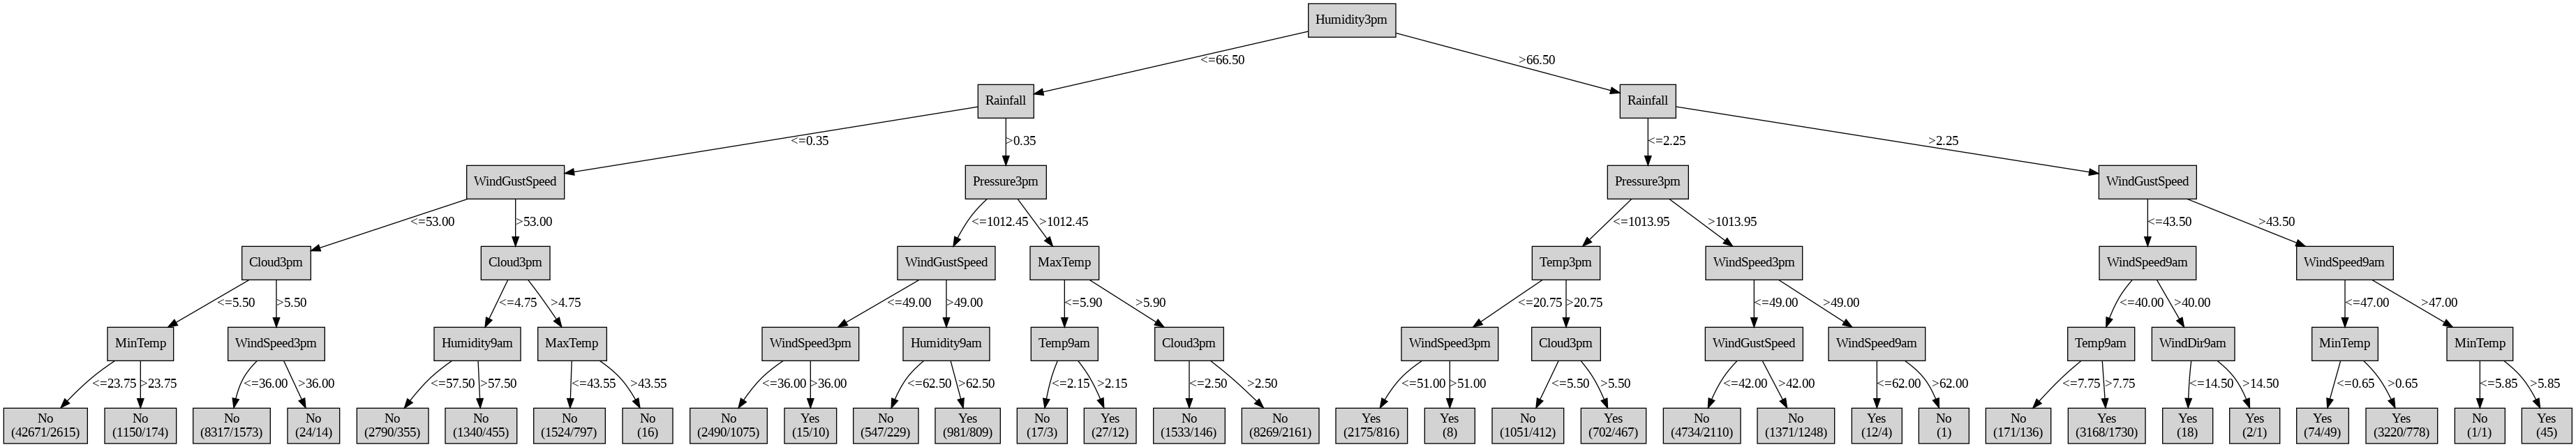

In [ ]:
# display exported picture
from IPython.display import Image
Image(f'{exportName}.png')

In [ ]:
# xtempcobaPredict = x_test.iloc[1:2]
# # ytempcobaPredict = estimator.predict(xtempcobaPredict)
# print(xtempcobaPredict)
# print(y_test[1:2])

cbPredictHeader = ["MinTemp", "MaxTemp", "Rainfall", "WindGustDir", "WindGustSpeed", "WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am",
           "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "RainToday"]

inputData = [7.1, 13.0, 8.8, 5, 41.0, 5, 1, 24.0, 22.0, 100.0, 98.0, 1001.7, 1005.4, 8.0, 8.0, 8.6, 11.5, 0] #harusnya hasilnya yes
# inputData = [13.2, 18.3, 0.0, 14, 48.0, 13, 13, 24.0, 20.0, 73.0, 73.0, 1027.6, 1023.8, 4.437189, 4.503167, 14.2, 17.0, 1] #harusnya hasilnya no

cbPredictData = [inputData]

xCobaPredict = pd.DataFrame(data = cbPredictData, columns = cbPredictHeader)
yCobaPredict = estimator.predict(xCobaPredict)
print(xCobaPredict)
print(yCobaPredict)


   MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0     13.2     18.3       0.0           14           48.0          13   

   WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          13          24.0          20.0         73.0         73.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  
0       1027.6       1023.8  4.437189  4.503167     14.2     17.0          1  
['No']
